<a href="https://colab.research.google.com/github/xalejandrow/interacting-with-the-twitter-api-project-tutorial/blob/main/Crimes_4GKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

In [9]:
# 1. Read the dataset
url = 'https://datos.cdmx.gob.mx/dataset/12d22477-bcf1-49ee-92aa-16a0d0a5817c/' + \
      'resource/3f308147-b1fc-49a9-92b7-e74f3f79aa9c/download/' + \
      'carpetas-de-investigacion-pgj-cdmx.csv'
df = pd.read_csv(url)

In [10]:
# 2. View the basic data structure and dimensions 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    808871 non-null  int64  
 1   ao_hechos             808673 non-null  float64
 2   mes_hechos            808673 non-null  object 
 3   fecha_hechos          808673 non-null  object 
 4   delito                808871 non-null  object 
 5   categoria_delito      808871 non-null  object 
 6   fiscalia              808871 non-null  object 
 7   agencia               808871 non-null  object 
 8   unidad_investigacion  808646 non-null  object 
 9   colonia_hechos        776781 non-null  object 
 10  alcaldia_hechos       807860 non-null  object 
 11  fecha_inicio          808871 non-null  object 
 12  mes_inicio            808871 non-null  object 
 13  ao_inicio             808871 non-null  int64  
 14  calle_hechos          806467 non-null  object 
 15  

In [11]:
# 3. Display some observations
df.sample(10)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
713574,713574,2017.0,Noviembre,2017-11-01 11:00:00,AMENAZAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-3CD,VALLE ESCONDIDO,TLALPAN,2017-11-18 18:00:59,Noviembre,2017,PROL. LA JOYA,NaN,-99.142476,19.278879,"19.2788786689,-99.142476415"
66714,66714,2016.0,Abril,2016-04-12 10:00:00,DISCRIMINACION,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-3,UI-2SD,NARVARTE,BENITO JUAREZ,2016-05-31 11:54:10,Mayo,2016,PALENQUE,NaN,-99.152854,19.385725,"19.385724682,-99.1528535818"
54792,54792,2016.0,Febrero,2016-02-22 20:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-3,UI-1CD,JARDÍN BALBUENA,VENUSTIANO CARRANZA,2016-02-22 22:20:42,Febrero,2016,CALZADA IGNACIO ZARAGOZA,IZTACCIHUATL,-99.099308,19.421516,"19.4215159998,-99.099308"
349229,349229,2017.0,Noviembre,2017-11-03 01:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-3CD,LOMAS DE SAN LORENZO,IZTAPALAPA,2017-11-03 12:58:46,Noviembre,2017,AV DEL ARBOL,ESQUINA NOCHE BUENA (PARALELA),-99.060979,19.315490,"19.3154904378,-99.0609794852"
641600,641600,2018.0,Febrero,2018-02-13 15:50:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-3CD,BUENAVISTA,CUAUHTEMOC,2018-02-13 16:45:32,Febrero,2018,AV. INSURGENTES NORTE,NaN,-99.153274,19.443774,"19.4437740998,-99.1532736"
446005,446005,2019.0,Marzo,2019-03-04 17:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-2,UI-1SD,MOCTEZUMA 2A SECCIÓN,VENUSTIANO CARRANZA,2019-03-05 12:54:36,Marzo,2019,CIRCUITO INTERIOR,NaN,-99.093688,19.424992,"19.4249919916,-99.0936880968"
379228,379228,2017.0,Noviembre,2017-11-28 14:30:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-1CD,BUENAVISTA,CUAUHTEMOC,2018-01-03 16:07:00,Enero,2018,MARTE,NaN,-99.146925,19.450979,"19.4509785822,-99.1469249881"
564394,564394,2018.0,Enero,2018-01-03 15:45:00,ABUSO DE AUTORIDAD,DELITO DE BAJO IMPACTO,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,B,UI-2CD,ACTIPAN,BENITO JUAREZ,2019-04-29 15:59:54,Abril,2019,AV. TLALPAN,NaN,-99.180295,19.369609,"19.3696087215,-99.1802950759"
578396,578396,2018.0,Julio,2018-07-28 20:00:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-3SD,GABRIEL RAMOS MILLÁN SECCIÓN BRAMADERO,IZTACALCO,2018-07-28 22:08:48,Julio,2018,SUR 157,AV. TE,-99.095258,19.396018,"19.3960180626,-99.0952579791"
431836,431836,2017.0,Diciembre,2017-12-12 09:30:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-3SD,AGRÍCOLA ORIENTAL,IZTACALCO,2017-12-12 18:36:37,Diciembre,2017,SUR 16,CASI ESQUINA CON ORIENTE 233-A,-99.078654,19.395508,"19.3955078844,-99.0786536286"


In [12]:
# We want only the mayors from Ciudad de Mexico
lista = ['ALVARO OBREGON','AZCAPOTZALCO','BENITO JUAREZ','COYOACAN','CUAJIMALPA DE MORELOS','CUAUHTEMOC','GUSTAVO A MADERO','IZTACALCO','IZTAPALAPA','LA MAGDALENA CONTRERAS','MIGUEL HIDALGO','MILPA ALTA','TLAHUAC','TLALPAN','VENUSTIANO CARRANZA','XOCHIMILCO']
df = df[df['alcaldia_hechos'].isin(lista)]
df


,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
5,5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808866,808866,2018.0,Julio,2018-07-09 22:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-1,UI-1SD,ANAHUAC,MIGUEL HIDALGO,2018-07-10 18:24:33,Julio,2018,LAGO ALBERTO,LAGO ITZEO,-99.182018,19.439418,"19.439418014,-99.1820184667"
808867,808867,2018.0,Julio,2018-07-29 05:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MILPA ALTA,MIL-2,UI-1CD,SANTA CRUZ XOCHITEPEC,XOCHIMILCO,2018-07-29 12:37:27,Julio,2018,CALLEJON MORELOS,NaN,-99.134738,19.254935,"19.2549354998,-99.1347381"
808868,808868,2019.0,Febrero,2019-02-14 19:00:00,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÓN EN MIGUEL HIDALGO,H1,UI-1SD,INDUSTRIAL,GUSTAVO A MADERO,2019-02-15 12:50:00,Febrero,2019,CALZ. DE LOS MISTERIOS,NaN,-99.122943,19.473867,"19.473866796,-99.1229431996"
808869,808869,2019.0,Febrero,2019-02-15 10:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-1SD,COSMOPOLITA,AZCAPOTZALCO,2019-02-15 13:04:00,Febrero,2019,CERDEÑA,NaN,-99.163384,19.473593,"19.4735930736,-99.163384042"


In [13]:
df['alcaldia_hechos'].nunique()
df.alcaldia_hechos.nunique()

16

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800207 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800207 non-null  int64  
 1   ao_hechos             800021 non-null  float64
 2   mes_hechos            800021 non-null  object 
 3   fecha_hechos          800021 non-null  object 
 4   delito                800207 non-null  object 
 5   categoria_delito      800207 non-null  object 
 6   fiscalia              800207 non-null  object 
 7   agencia               800207 non-null  object 
 8   unidad_investigacion  799985 non-null  object 
 9   colonia_hechos        776763 non-null  object 
 10  alcaldia_hechos       800207 non-null  object 
 11  fecha_inicio          800207 non-null  object 
 12  mes_inicio            800207 non-null  object 
 13  ao_inicio             800207 non-null  int64  
 14  calle_hechos          798142 non-null  object 
 15  

In [15]:
# Convert the values to the right type

df['fecha_hechos'] = df['fecha_hechos'].astype('datetime64')
df['fecha_inicio'] = df['fecha_inicio'].astype('datetime64')
#df['ao_hechos'] = df['ao_hechos'].astype(int) #no se puede porque tiene NaN

df['mes_hechos'] = pd.Categorical(df['mes_hechos'])
df['delito'] = pd.Categorical(df['delito'])
df['categoria_delito'] = pd.Categorical(df['categoria_delito'])
df['unidad_investigacion'] = pd.Categorical(df['unidad_investigacion'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800207 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    800207 non-null  int64         
 1   ao_hechos             800021 non-null  float64       
 2   mes_hechos            800021 non-null  category      
 3   fecha_hechos          800021 non-null  datetime64[ns]
 4   delito                800207 non-null  category      
 5   categoria_delito      800207 non-null  category      
 6   fiscalia              800207 non-null  object        
 7   agencia               800207 non-null  object        
 8   unidad_investigacion  799985 non-null  category      
 9   colonia_hechos        776763 non-null  object        
 10  alcaldia_hechos       800207 non-null  object        
 11  fecha_inicio          800207 non-null  datetime64[ns]
 12  mes_inicio            800207 non-null  object        
 13 

In [16]:
# Summarise the data, including dates
df.describe(datetime_is_numeric=True)

,id,ao_hechos,fecha_hechos,fecha_inicio,ao_inicio,longitud,latitud
count,800207.000000,800021.000000,800021,800207,800207.000000,777531.000000,777531.000000
mean,404440.724969,2017.233964,2017-09-15 06:18:33.451072768,2017-11-08 17:23:31.065400576,2017.385711,-99.137482,19.388497
min,0.000000,1906.000000,1906-06-02 19:00:00,2016-01-01 01:35:06,2016.000000,-99.342765,9.486549
25%,202177.500000,2016.000000,2016-11-28 10:30:00,2017-01-09 17:54:14,2017.000000,-99.174906,19.342264
50%,404476.000000,2017.000000,2017-10-27 11:30:00,2017-11-27 12:11:57,2017.000000,-99.142680,19.391685
75%,606686.500000,2018.000000,2018-08-25 13:00:00,2018-09-19 16:27:08.500000,2018.000000,-99.101421,19.437588
max,808870.000000,2019.000000,2019-06-30 23:00:00,2019-06-30 23:56:29,2019.000000,-98.946873,19.582490
std,233527.398708,1.412214,NaN,NaN,1.020460,0.058753,0.069692


In [17]:
# Reemplazamos las fechas de hechos por la de inicio cuando es menor a 2016 o es NA
df['fecha_hechos']=df['fecha_hechos'].mask((df['fecha_hechos'].dt.year<2016) | (df['fecha_hechos'].isna()), df['fecha_inicio'])
# Reemplazamos ao_hecho por ao_inicio cuando es menor a 2016 o es NA
df['ao_hechos']=df['ao_hechos'].mask((df['ao_hechos']<2016) | (df['ao_hechos'].isna()), df['ao_inicio'])
# Reemplazamos me de hecho por mes_inicio cuando es NA
df['mes_hechos']=df['mes_hechos'].mask(df['mes_hechos'].isna() , df['mes_inicio'])


In [18]:
# How many crimes are recorded in this dataset? In which period?
print(f'There are {len(df)} crimes from {df["fecha_inicio"].min()} to {df["fecha_inicio"].dt.date.max()}')

There are 800207 crimes from 2016-01-01 01:35:06 to 2019-06-30


In [19]:
# How many crimes were recorded by year?
#data=df['ao_inicio'].value_counts(ascending=True)
df['ao_inicio'].value_counts()


2018    252510
2017    225854
2016    195849
2019    125994
Name: ao_inicio, dtype: int64

In [20]:
df = df.set_index(df['fecha_hechos'])

In [21]:
df_count=df.groupby(df.index.year).size().reset_index(name='crimes')
print(df_count)

   fecha_hechos  crimes
0          2016  209822
1          2017  227503
2          2018  249483
3          2019  113399


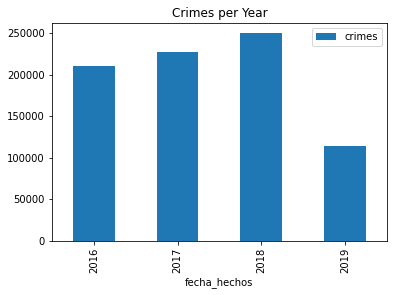

In [22]:
df_count.plot.bar(title='Crimes per Year',x="fecha_hechos",y="crimes")
plt.show()

In [23]:
# Show the top 5 crimes
df.groupby('delito').size().reset_index(name='crimes').sort_values(by='crimes',ascending=False).head(5)

,delito,crimes
272,VIOLENCIA FAMILIAR,69007
222,ROBO DE OBJETOS,51870
158,ROBO A NEGOCIO SIN VIOLENCIA,51396
75,FRAUDE,44826
51,DENUNCIA DE HECHOS,43613


In [24]:
df['delito'].value_counts().head(5)

VIOLENCIA FAMILIAR              69007
ROBO DE OBJETOS                 51870
ROBO A NEGOCIO SIN VIOLENCIA    51396
FRAUDE                          44826
DENUNCIA DE HECHOS              43613
Name: delito, dtype: int64

In [25]:
# Calculate the accumulated rate of the top 5 crimes
#df.groupby('delito').size().reset_index(name='crimes').sort_values(by='crimes',ascending=False).assign(rate=lambda x:x['crimes']/sum(x['crimes'])).head(5)
df.groupby('delito').size().reset_index(name='crimes').sort_values(by='crimes',ascending=False).assign(rate=lambda x:x['crimes']/sum(x['crimes'])*100,accum=lambda x:x['rate'].cumsum()).head(5)

,delito,crimes,rate,accum
272,VIOLENCIA FAMILIAR,69007,8.623644,8.623644
222,ROBO DE OBJETOS,51870,6.482073,15.105716
158,ROBO A NEGOCIO SIN VIOLENCIA,51396,6.422838,21.528554
75,FRAUDE,44826,5.601801,27.130355
51,DENUNCIA DE HECHOS,43613,5.450215,32.580570


In [26]:
df.groupby('delito').size().reset_index(name='crimes').sort_values(by='crimes',ascending=False).assign(rate=lambda x: x['crimes']/len(df)).head(5)

,delito,crimes,rate
272,VIOLENCIA FAMILIAR,69007,0.086236
222,ROBO DE OBJETOS,51870,0.064821
158,ROBO A NEGOCIO SIN VIOLENCIA,51396,0.064228
75,FRAUDE,44826,0.056018
51,DENUNCIA DE HECHOS,43613,0.054502


In [27]:
# Which city has the most and the less crimes in the dataset?
df.groupby('alcaldia_hechos').size()

alcaldia_hechos
ALVARO OBREGON             52568
AZCAPOTZALCO               39435
BENITO JUAREZ              70599
COYOACAN                   54235
CUAJIMALPA DE MORELOS      11393
CUAUHTEMOC                131397
GUSTAVO A MADERO           80097
IZTACALCO                  34407
IZTAPALAPA                119926
LA MAGDALENA CONTRERAS     12064
MIGUEL HIDALGO             53688
MILPA ALTA                  5159
TLAHUAC                    18197
TLALPAN                    46179
VENUSTIANO CARRANZA        46224
XOCHIMILCO                 24639
dtype: int64

In [28]:
# Which city has the most and the less crimes in the dataset?
df.groupby('alcaldia_hechos').size().reset_index(name="Crimes").sort_values(by='Crimes', ascending=False)

,alcaldia_hechos,Crimes
5,CUAUHTEMOC,131397
8,IZTAPALAPA,119926
6,GUSTAVO A MADERO,80097
2,BENITO JUAREZ,70599
3,COYOACAN,54235
10,MIGUEL HIDALGO,53688
0,ALVARO OBREGON,52568
14,VENUSTIANO CARRANZA,46224
13,TLALPAN,46179
1,AZCAPOTZALCO,39435


In [29]:
df_cities=df.groupby('alcaldia_hechos').size().reset_index(name="Crimes").sort_values(by='Crimes', ascending=False)
df_cities['Crimes'] = df_cities['Crimes'].map('{:,d}'.format)
df_cities

,alcaldia_hechos,Crimes
5,CUAUHTEMOC,"131,397"
8,IZTAPALAPA,"119,926"
6,GUSTAVO A MADERO,"80,097"
2,BENITO JUAREZ,"70,599"
3,COYOACAN,"54,235"
10,MIGUEL HIDALGO,"53,688"
0,ALVARO OBREGON,"52,568"
14,VENUSTIANO CARRANZA,"46,224"
13,TLALPAN,"46,179"
1,AZCAPOTZALCO,"39,435"


In [30]:
# In each city, what are the top 3 subcities ("Colonias") with most crimes?

#df_colony = df.groupby(['alcaldia_hechos','colonia_hechos']).size().to_frame(name='Crime')
df_colony = df.groupby(['alcaldia_hechos','colonia_hechos']).size().to_frame().rename(columns={0:'Crimes'}).sort_values(by=['alcaldia_hechos','Crimes'],ascending=[True,False]).groupby(level=0).head(3)
df_colony

Crimes
alcaldia_hechos        colonia_hechos                          
ALVARO OBREGON         JARDINES DEL PEDREGAL               2335
                       SAN ANGEL                           2019
                       ZEDEC SANTA FE                      1843
AZCAPOTZALCO           EL ROSARIO                          2820
                       INDUSTRIAL VALLEJO                  1930
                       CENTRO DE AZCAPOTZALCO              1796
BENITO JUAREZ          DEL VALLE CENTRO                   12644
                       NARVARTE                            9317
                       PORTALES SUR                        4587
COYOACAN               PEDREGAL DE SANTO DOMINGO           4434
                       AJUSCO                              2377
                       DEL CARMEN                          2348
CUAJIMALPA DE MORELOS  CUAJIMALPA                          1693
                       LOMAS DE SANTA FE                   1655
                       SAN JOSÉ DE LOS CEDROS              1008
CUAUHTEMOC             CENTRO                             28751
                       DOCTORES                           16657
                       ROMA NORTE                         10403
GUSTAVO A MADERO       LINDAVISTA                          3737
                       GUADALUPE TEPEYAC                   3208
                       SAN FELIPE DE JESÚS                 2284
IZTACALCO              AGRÍCOLA ORIENTAL                   6663
                       AGRÍCOLA PANTITLAN                  5476
                       GRANJAS MÉXICO                      3604
IZTAPALAPA             CENTRAL DE ABASTO                   5264
                       LOMAS DE SAN LORENZO                3060
                       DESARROLLO URBANO QUETZALCOATL      2990
LA MAGDALENA CONTRERAS SAN JERÓNIMO LÍDICE                 1452
                       SAN NICOLÁS TOTOLAPAN               1008
                       SAN BERNABÉ OCOTEPEC                 672
MIGUEL HIDALGO         POLANCO                             7131
                       ANAHUAC                             3796
                       LOMAS DE CHAPULTEPEC I SECCIÓN      3196
MILPA ALTA             CRUZTITLA (SAN ANTONIO TECOMITL)     390
                       SANTA MARTHA (VILLA MILPA ALTA)      342
                       SAN MIGUEL (SAN PABLO OZTOTEPEC)     340
TLAHUAC                DEL MAR                             1121
                       MIGUEL HIDALGO                      1058
                       SAN FRANCISCO TLALTENCO              881
TLALPAN                SAN ANDRÉS TOTOLTEPEC               3000
                       TLALPAN CENTRO I                    1832
                       HÉROES DE PADIERNA                  1798
VENUSTIANO CARRANZA    JARDÍN BALBUENA                     4464
                       MOCTEZUMA 2A SECCIÓN                3549
                       ZONA CENTRO                         3060
XOCHIMILCO             SAN GREGORIO ATLAPULCO              1607
                       SANTIAGO TEPALCATLALPAN             1301
                       SANTA CRUZ ACALPIXCA - PUEBLO       1223

In [31]:
# Do you see a trend per month or day?
#df.groupby([df['fecha_hechos'].dt.year.rename('year'),df['fecha_hechos'].dt.month.rename('month')]).size()
df_trend=df.groupby([df['fecha_hechos'].dt.year.rename('year'),df['fecha_hechos'].dt.month.rename('month')]).size().unstack('year')
df_trend

year,2016,2017,2018,2019
month,,,,
1,19272.0,17771.0,19399.0,19264.0
2,17832.0,16658.0,19438.0,19320.0
3,17758.0,18854.0,20987.0,20756.0
4,17869.0,17390.0,20610.0,18723.0
5,17708.0,19948.0,22072.0,19567.0
6,16419.0,19535.0,20701.0,15769.0
7,16169.0,19274.0,20835.0,NaN
8,17205.0,20155.0,21433.0,NaN
9,17973.0,18968.0,20649.0,NaN


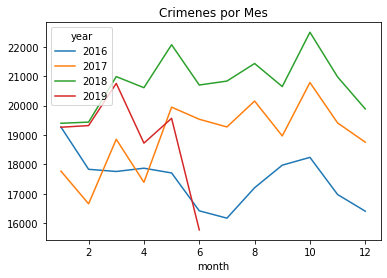

In [32]:
df_trend.plot(title='Crimenes por Mes')

In [33]:
df_trend_day=df.groupby([df['fecha_hechos'].dt.year.rename('year'),df['fecha_hechos'].dt.day.rename('day')]).size().unstack('year')
df_trend_day.head()

year,2016,2017,2018,2019
day,,,,
1,8097,8408,8466,3903
2,6753,7315,8102,3709
3,6858,7610,8242,3693
4,7685,7405,7908,3831
5,7152,7538,8484,3924


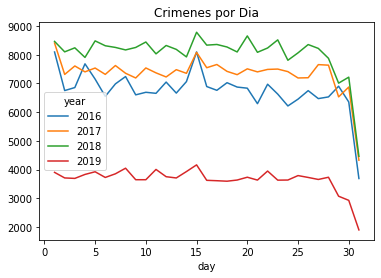

In [34]:
df_trend_day.plot(title='Crimenes por Dia')

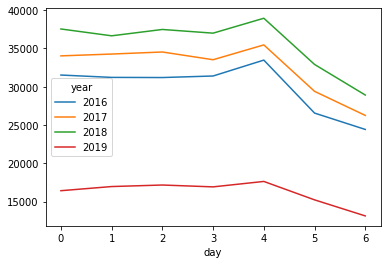

In [35]:
df.groupby([df['fecha_hechos'].dt.year.rename('year'),df['fecha_hechos'].dt.dayofweek.rename('day')]).size().unstack('year').plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


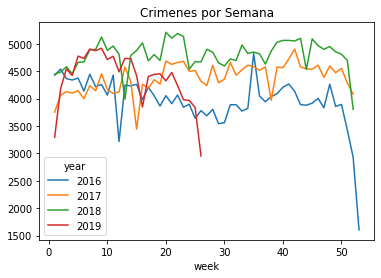

In [36]:
df.groupby([df['fecha_hechos'].dt.year.rename('year'),df['fecha_hechos'].dt.week.rename('week')]).size().unstack('year').plot(title='Crimenes por Semana')

https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 800207 entries, 2016-01-05 17:00:00 to 2017-04-01 10:00:00
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    800207 non-null  int64         
 1   ao_hechos             800207 non-null  float64       
 2   mes_hechos            800207 non-null  category      
 3   fecha_hechos          800207 non-null  datetime64[ns]
 4   delito                800207 non-null  category      
 5   categoria_delito      800207 non-null  category      
 6   fiscalia              800207 non-null  object        
 7   agencia               800207 non-null  object        
 8   unidad_investigacion  799985 non-null  category      
 9   colonia_hechos        776763 non-null  object        
 10  alcaldia_hechos       800207 non-null  object        
 11  fecha_inicio          800207 non-null  datetime64[ns]
 12  mes_inicio            80

In [57]:
from os import name
# Create a heatmap per Crimes and Cities
#df['delito'].nunique() # Verifico la cantidad de delitos
top_20=df.groupby('delito').size().to_frame(name='Count').sort_values(by='Count',ascending=False)
#print(top_20)
table=df[['alcaldia_hechos','delito']].pivot_table(index='alcaldia_hechos', columns='delito', values='delito', aggfunc=len).fillna(0)[top_20.index[:20]]
table

delito,VIOLENCIA FAMILIAR,ROBO DE OBJETOS,ROBO A NEGOCIO SIN VIOLENCIA,FRAUDE,DENUNCIA DE HECHOS,AMENAZAS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,ROBO A CASA HABITACION SIN VIOLENCIA,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,ABUSO DE CONFIANZA,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL,DESPOJO,ROBO A NEGOCIO CON VIOLENCIA,NARCOMENUDEO POSESION SIMPLE,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION
alcaldia_hechos,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,5094.0,3091.0,3242.0,2595.0,2980.0,2464.0,1364.0,2139.0,1267.0,2139.0,1281.0,1715.0,1400.0,956.0,832.0,1076.0,711.0,863.0,497.0,531.0
AZCAPOTZALCO,3116.0,2639.0,3293.0,1691.0,1447.0,2288.0,1173.0,2416.0,1311.0,1760.0,1086.0,925.0,1281.0,765.0,675.0,661.0,687.0,566.0,269.0,471.0
BENITO JUAREZ,2832.0,4419.0,6076.0,6461.0,3309.0,2452.0,1224.0,2293.0,6030.0,2813.0,2422.0,4068.0,1483.0,2390.0,1732.0,1217.0,897.0,725.0,178.0,817.0
COYOACAN,4570.0,3870.0,3919.0,3002.0,3274.0,2583.0,1277.0,1594.0,2056.0,2475.0,1795.0,2481.0,1652.0,954.0,847.0,1118.0,737.0,612.0,668.0,671.0
CUAJIMALPA DE MORELOS,1195.0,791.0,903.0,770.0,435.0,455.0,122.0,85.0,150.0,367.0,389.0,333.0,161.0,65.0,294.0,302.0,256.0,77.0,95.0,117.0
CUAUHTEMOC,5640.0,10291.0,8095.0,11863.0,9216.0,5129.0,5432.0,4187.0,3981.0,2462.0,2139.0,3662.0,1194.0,6051.0,1891.0,1412.0,1597.0,1290.0,1900.0,1444.0
GUSTAVO A MADERO,7509.0,4278.0,5560.0,3070.0,4170.0,3548.0,3110.0,1987.0,2551.0,1781.0,2263.0,1536.0,2731.0,1425.0,1193.0,1059.0,1314.0,1354.0,1336.0,1214.0
IZTACALCO,4348.0,1919.0,1072.0,1322.0,1988.0,1633.0,1312.0,1738.0,1042.0,1164.0,984.0,562.0,942.0,961.0,551.0,579.0,509.0,640.0,229.0,474.0
IZTAPALAPA,13277.0,7115.0,8026.0,3524.0,6295.0,6069.0,6178.0,4720.0,1914.0,2390.0,2886.0,1788.0,3583.0,1746.0,1497.0,1480.0,1613.0,2106.0,2115.0,1335.0


In [61]:
table_sc_cities = table.apply(lambda x: x / sum(x),axis=0)
table_sc_crimes = table.apply(lambda x: x / sum(x),axis=1)
#table_sc_cities
table_sc_crimes

delito,VIOLENCIA FAMILIAR,ROBO DE OBJETOS,ROBO A NEGOCIO SIN VIOLENCIA,FRAUDE,DENUNCIA DE HECHOS,AMENAZAS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,ROBO A CASA HABITACION SIN VIOLENCIA,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,ABUSO DE CONFIANZA,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL,DESPOJO,ROBO A NEGOCIO CON VIOLENCIA,NARCOMENUDEO POSESION SIMPLE,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION
alcaldia_hechos,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,0.140575,0.085300,0.089467,0.071612,0.082236,0.067997,0.037641,0.059028,0.034964,0.059028,0.035351,0.047327,0.038635,0.026382,0.022960,0.029693,0.019621,0.023815,0.013715,0.014654
AZCAPOTZALCO,0.109257,0.092532,0.115463,0.059292,0.050736,0.080224,0.041129,0.084712,0.045968,0.061711,0.038079,0.032433,0.044916,0.026823,0.023668,0.023177,0.024088,0.019846,0.009432,0.016515
BENITO JUAREZ,0.052602,0.082080,0.112857,0.120008,0.061462,0.045544,0.022735,0.042591,0.112003,0.052249,0.044987,0.075560,0.027546,0.044392,0.032171,0.022605,0.016661,0.013466,0.003306,0.015175
COYOACAN,0.113809,0.096377,0.097597,0.074760,0.081534,0.064326,0.031802,0.039696,0.051202,0.061636,0.044702,0.061786,0.041141,0.023758,0.021093,0.027842,0.018354,0.015241,0.016636,0.016710
CUAJIMALPA DE MORELOS,0.162320,0.107444,0.122657,0.104591,0.059087,0.061804,0.016572,0.011546,0.020375,0.049851,0.052839,0.045232,0.021869,0.008829,0.039935,0.041021,0.034773,0.010459,0.012904,0.015892
CUAUHTEMOC,0.063459,0.115791,0.091082,0.133478,0.103695,0.057710,0.061119,0.047111,0.044793,0.027702,0.024067,0.041203,0.013434,0.068084,0.021277,0.015887,0.017969,0.014515,0.021378,0.016247
GUSTAVO A MADERO,0.141709,0.080734,0.104927,0.057937,0.078696,0.066957,0.058691,0.037498,0.048142,0.033611,0.042707,0.028987,0.051539,0.026892,0.022514,0.019985,0.024798,0.025552,0.025213,0.022910
IZTACALCO,0.181401,0.080062,0.044724,0.055155,0.082940,0.068130,0.054737,0.072510,0.043473,0.048563,0.041053,0.023447,0.039301,0.040093,0.022988,0.024156,0.021236,0.026701,0.009554,0.019776
IZTAPALAPA,0.166677,0.089320,0.100757,0.044240,0.079026,0.076189,0.077558,0.059254,0.024028,0.030004,0.036230,0.022446,0.044980,0.021919,0.018793,0.018580,0.020249,0.026438,0.026551,0.016759


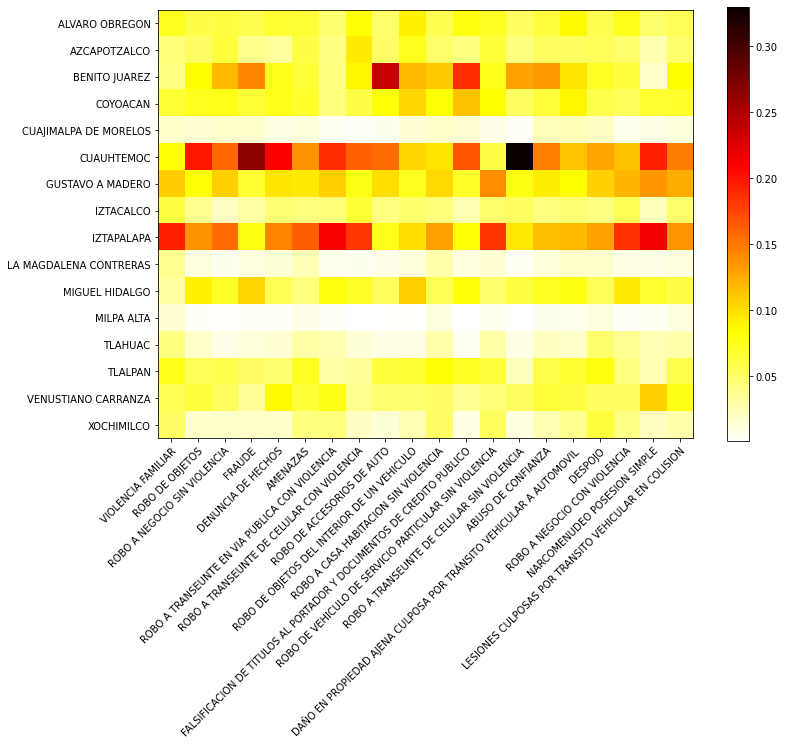

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(table_sc_cities, cmap="hot_r")
ax.set_xticks(np.arange(table_sc_cities.shape[1]))
ax.set_yticks(np.arange(table_sc_cities.shape[0]))
ax.set_xticklabels(table_sc_cities.columns.to_list())
ax.set_yticklabels(table_sc_cities.index.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.colorbar(im)
plt.show()

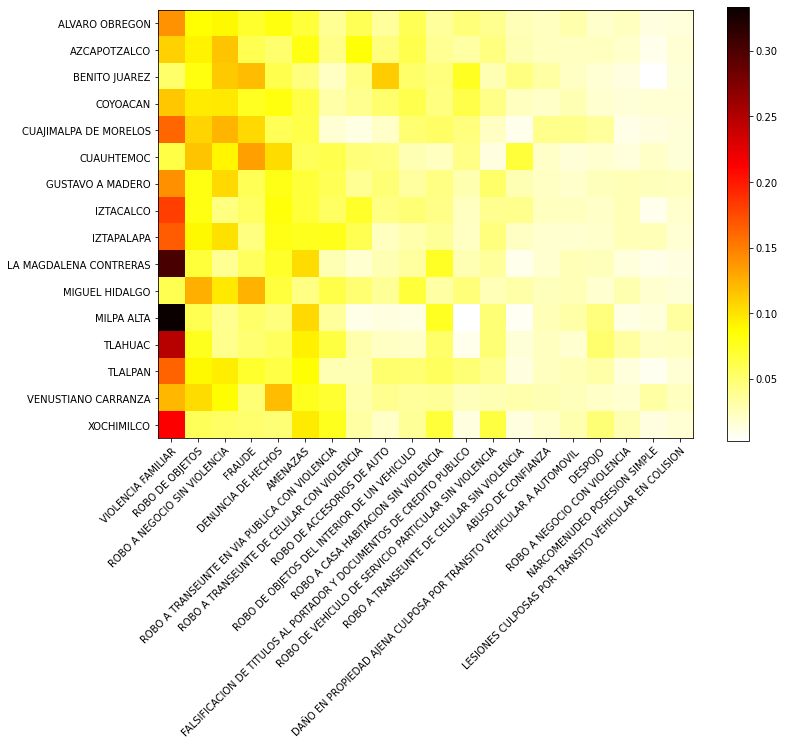

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(table_sc_crimes, cmap="hot_r")
ax.set_xticks(np.arange(table_sc_crimes.shape[1]))
ax.set_yticks(np.arange(table_sc_crimes.shape[0]))
ax.set_xticklabels(table_sc_crimes.columns.to_list())
ax.set_yticklabels(table_sc_crimes.index.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.colorbar(im)
plt.show()

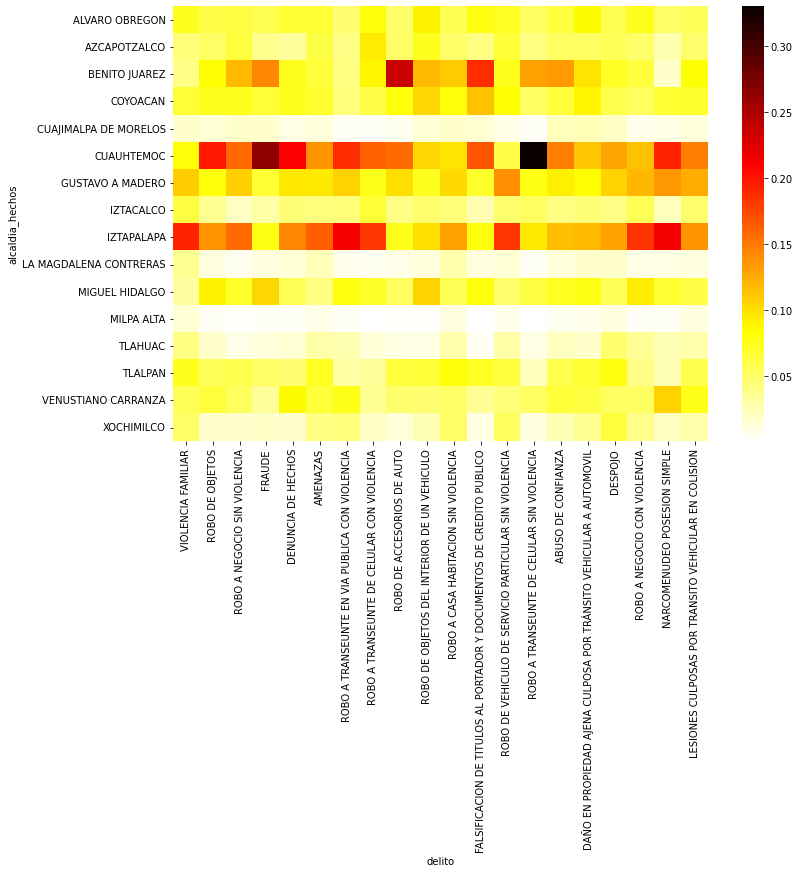

In [71]:
# Create a heatmap per Crimes and Cities with seaborn
fig, ax= plt.subplots(figsize=(12,8))
sns.heatmap(table_sc_cities, cmap='hot_r')
ax.plot()
plt.show()

In [ ]:
# Create a heatmap per Crimes and Cities with plotly.express

In [ ]:
# Create a map for phone robbery with violence with folium

In [ ]:
# Create a map for phone robbery with violence with plotly.express